In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
print(data)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [5]:
from sklearn import preprocessing
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [6]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(-1)}
36
0.7512737378415933


DBSCAN принимает следующие параметры:

eps: Максимальное расстояние между двумя точками, чтобы они считались соседями (по умолчанию 0.5).

min_samples: Минимальное количество точек для формирования кластера (по умолчанию 5).

metric: Метрика расстояния, например, 'euclidean' (по умолчанию), 'manhattan', 'cosine' и т.д.

metric_params: Дополнительные параметры для метрики (по умолчанию None).
algorithm: Алгоритм поиска соседей: 'auto', 'ball_tree', 'kd_tree', 'brute' (по умолчанию 'auto').

leaf_size: Размер листа для алгоритмов BallTree или KDTree (по умолчанию 30).
p: Параметр для метрики Минковского (по умолчанию None).

n_jobs: Количество параллельных задач (по умолчанию None, т.е. 1).

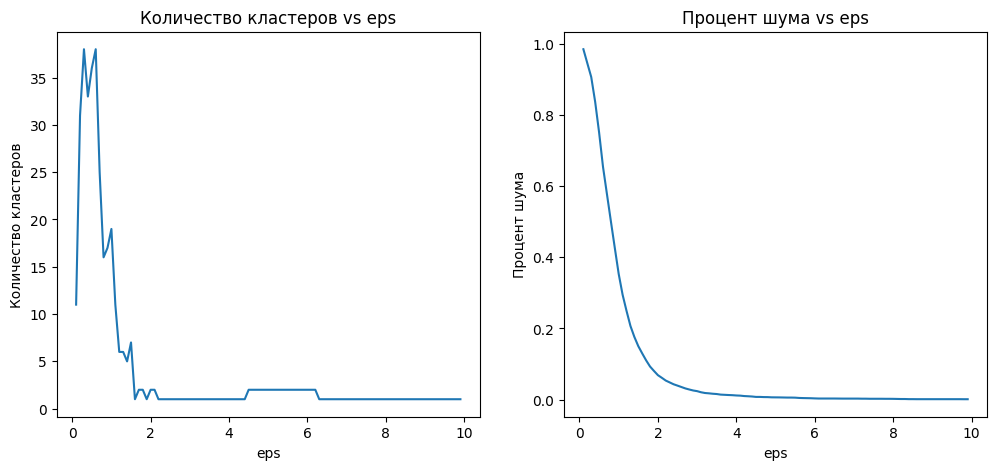

In [7]:
# Диапазон значений eps от 0.1 до 10 с шагом 0.1
eps_values = np.arange(0.1, 10.0, 0.1)
n_clusters = []
noise_percent = []

# Цикл по значениям eps
for eps in eps_values:
    db = DBSCAN(eps=eps).fit(scaled_data)
    labels = db.labels_
    unique_labels = set(labels)
    n_clusters.append(len(unique_labels) - (1 if -1 in labels else 0))  # Количество кластеров без шума
    noise_percent.append(list(labels).count(-1) / len(labels))  # Процент шума

# Построение графиков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(eps_values, n_clusters)
plt.title('Количество кластеров vs eps')
plt.xlabel('eps')
plt.ylabel('Количество кластеров')

plt.subplot(1, 2, 2)
plt.plot(eps_values, noise_percent)
plt.title('Процент шума vs eps')
plt.xlabel('eps')
plt.ylabel('Процент шума')
plt.show()

# Пояснение:
# - min_samples остаётся по умолчанию (5)
# - Графики показывают, как eps влияет на кластеризацию

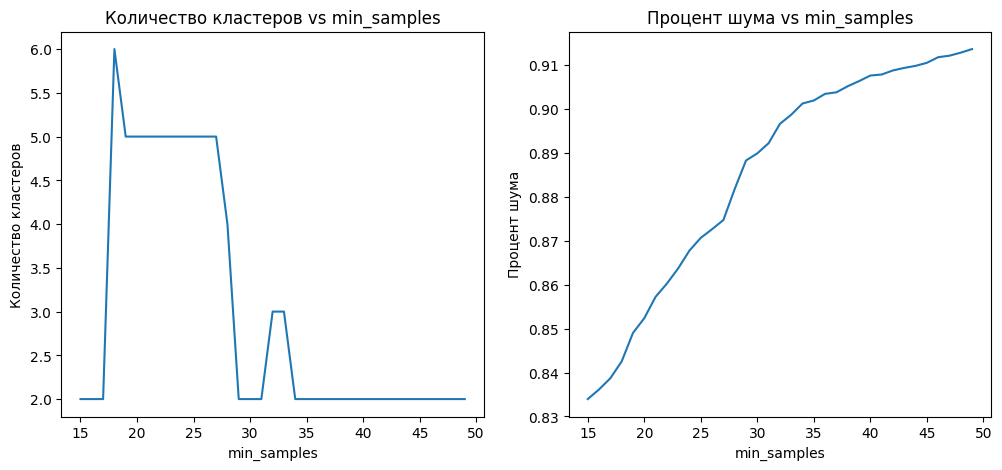

In [8]:
# Диапазон значений min_samples от 2 до 50
min_samples_values = range(15, 50)
n_clusters_min_samples = []
noise_percent_min_samples = []

# Цикл по значениям min_samples
for min_samples in min_samples_values:
    db = DBSCAN(min_samples=min_samples).fit(scaled_data)
    labels = db.labels_
    unique_labels = set(labels)
    n_clusters_min_samples.append(len(unique_labels) - (1 if -1 in labels else 0))
    noise_percent_min_samples.append(list(labels).count(-1) / len(labels))

# Построение графиков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(min_samples_values, n_clusters_min_samples)
plt.title('Количество кластеров vs min_samples')
plt.xlabel('min_samples')
plt.ylabel('Количество кластеров')

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, noise_percent_min_samples)
plt.title('Процент шума vs min_samples')
plt.xlabel('min_samples')
plt.ylabel('Процент шума')
plt.show()

# Пояснение:
# - eps остаётся по умолчанию (0.5)
# - Графики показывают влияние min_samples на результаты

min_samples. Минимальные выборки, необходимые для классификации точки данных как базовой.

xi. Определяет минимальную крутизну кластерной структуры.  

min_cluster_size. Минимальное количество выборок, требуемое для допустимого кластера.

max_eps. Максимальное расстояние до окрестности, точки, превышающие это значение, классифицируются как шумовые.  

p. Параметр мощности для метрики Минковского (например, евклидовой при p = 2)

cluster_method. Метод извлечения кластеров, может быть «dbscan» или «xi».  
eps. Пороговое значение расстояния для идентификации соседних точек.  
алгоритм. Метод поиска ближайшего соседа, может быть «auto», «ball_tree», «kd_tree», «brute».  

n_jobs. Количество ядер процессора, используемых во время вычислений.

In [10]:
# Поиск параметров, где количество кластеров 5–7, а процент шума ≤ 12%
from tqdm import tqdm

best_params = []
eps_range = np.arange(0.1, 10.1, 0.25)
min_samples_range = list(range(3, 15)) + [20, 25]
total_points = len(scaled_data)

for eps in tqdm(eps_range):
    for min_samples in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_perc = np.sum(labels == -1) / total_points
        if 5 <= n_clusters <= 7 and noise_perc <= 0.12:
            best_params.append((eps, min_samples, n_clusters, noise_perc))

for param in best_params:
    print(f"eps: {param[0]}, min_samples: {param[1]}, кластеров: {param[2]}, шум: {param[3]:.2%}")

# Выбираем один набор параметров, например, первый
if best_params != []:
  chosen_eps, chosen_min_samples = best_params[0][0], best_params[0][1]

100%|██████████| 40/40 [11:56<00:00, 17.92s/it]

eps: 2.5999999999999996, min_samples: 3, кластеров: 5, шум: 3.09%
eps: 5.349999999999999, min_samples: 3, кластеров: 5, шум: 0.37%


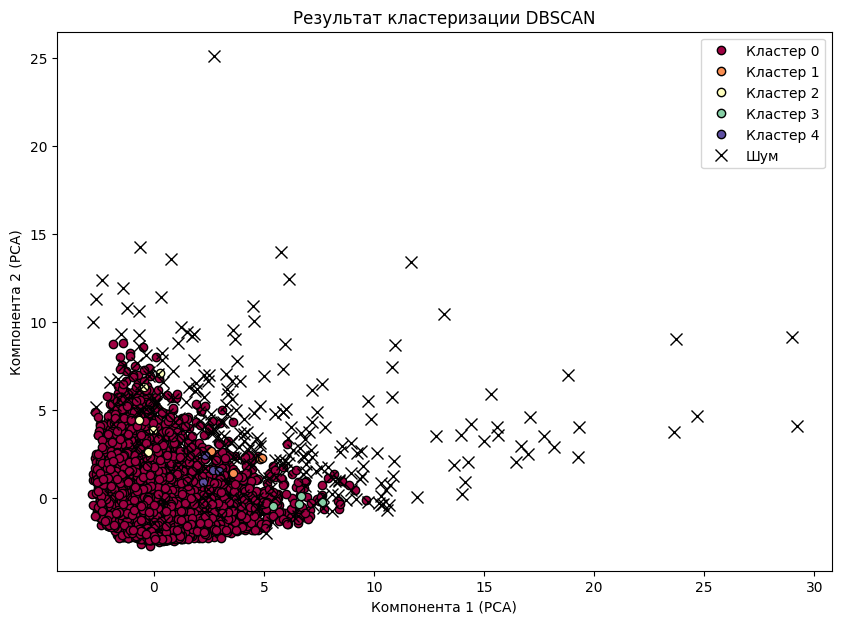

Количество кластеров: 5
Процент шума: 3.09%
Уникальные метки: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(-1)}


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Кластеризация с DBSCAN
dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples).fit(scaled_data)
labels = dbscan.labels_

# Понижение размерности до 2D с помощью PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

# Визуализация результатов DBSCAN
plt.figure(figsize=(10, 7))

# Уникальные метки кластеров, исключая шум
unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)  # Убираем шум из списка кластеров

# Генерируем цвета для кластеров
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Рисуем кластеры
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = data_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=6,
             label=f'Кластер {k}')

# Рисуем шум
noise_mask = (labels == -1)
xy_noise = data_2d[noise_mask]
plt.plot(xy_noise[:, 0], xy_noise[:, 1], 'x',
         color='black',
         markersize=8,
         label='Шум')

plt.title('Результат кластеризации DBSCAN')
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.legend()
plt.show()

# Диагностика
print(f"Количество кластеров: {len(unique_labels)}")
print(f"Процент шума: {np.sum(labels == -1) / len(labels):.2%}")
print(f"Уникальные метки: {set(labels)}")

In [12]:
# Используем параметры DBSCAN из пункта 6
optics = OPTICS(min_samples=chosen_min_samples, max_eps=chosen_eps,
                cluster_method='dbscan', eps=chosen_eps).fit(scaled_data)

# Сравнение с DBSCAN через Adjusted Rand Index
db_labels = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples).fit(scaled_data).labels_
optics_labels = optics.labels_
ari = adjusted_rand_score(db_labels, optics_labels)
print(f"Adjusted Rand Index: {ari}")

# Пояснение:
# - ARI близкий к 1 означает высокую схожесть кластеризаций

Adjusted Rand Index: 0.9998784214011318


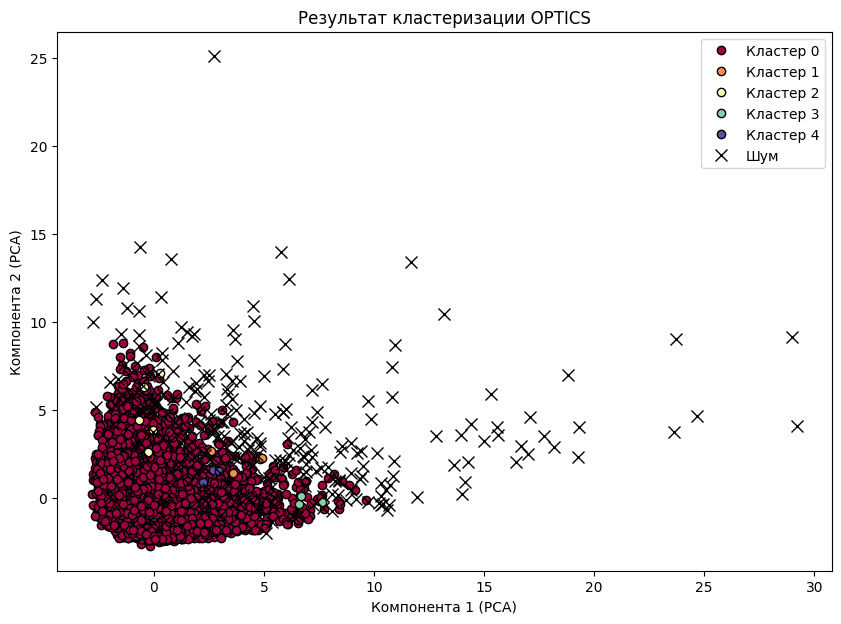

Количество кластеров: 5
Процент шума: 3.11%
Уникальные метки: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(-1)}


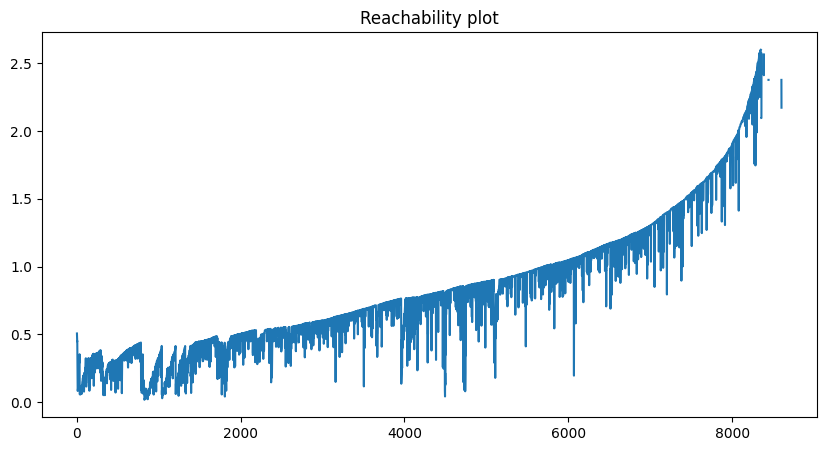

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = optics.labels_

# Визуализация результатов OPTICS
plt.figure(figsize=(10, 7))

# Уникальные метки кластеров, исключая шум
unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)  # Убираем шум из списка кластеров

# Генерируем цвета для кластеров
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Рисуем кластеры
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = data_2d[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=6,
             label=f'Кластер {k}')

# Рисуем шум
noise_mask = (labels == -1)
xy_noise = data_2d[noise_mask]
plt.plot(xy_noise[:, 0], xy_noise[:, 1], 'x',
         color='black',
         markersize=8,
         label='Шум')

plt.title('Результат кластеризации OPTICS')
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.legend()
plt.show()

# Проверка данных
print(f"Количество кластеров: {len(unique_labels)}")
print(f"Процент шума: {np.sum(labels == -1) / len(labels):.2%}")
print(f"Уникальные метки: {set(labels)}")

# Reachability plot
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(10, 5))
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

In [15]:
# Список метрик для исследования
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

for metric in metrics:
    if metric == 'minkowski':
        optics = OPTICS(min_samples=chosen_min_samples, metric=metric, p=3).fit(scaled_data)
    else:
        optics = OPTICS(min_samples=chosen_min_samples, metric=metric).fit(scaled_data)
    labels = optics.labels_
    unique_labels = set(labels)
    n_clust = len(unique_labels) - (1 if -1 in labels else 0)
    noise_perc = list(labels).count(-1) / len(labels)
    print(f"Метрика: {metric}, Кластеров: {n_clust}, Шум: {noise_perc:.2%}")

Метрика: euclidean, Кластеров: 525, Шум: 74.32%
Метрика: manhattan, Кластеров: 437, Шум: 77.69%
Метрика: chebyshev, Кластеров: 506, Шум: 73.71%
Метрика: minkowski, Кластеров: 563, Шум: 71.25%
Метрика: cosine, Кластеров: 623, Шум: 67.26%
